<a href="https://colab.research.google.com/github/jtallison/LDLFest-workshop/blob/master/workbook-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import re, nltk, numpy as np, pandas as pd, matplotlib.pyplot as plt
from operator import itemgetter

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 300

## Counting Words

Like last time, we start with loading our text. 

Then we turn it into a list of words: we're throwing away all the punctuation -- *Sentences? We don't need no stinking sentences!* 

We're also making everything lower case so that "He" = "he".

In [23]:
# First we load our file into a string
mdg = open('texts/most-dangerous-game.txt', 'r').read()

# Then we turn that string into a list of words
mdg_words = re.sub("[^a-zA-Z']"," ", mdg).lower().split()

print(mdg_words[0:25])

['off', 'there', 'to', 'the', 'right', 'somewhere', 'is', 'a', 'large', 'island', 'said', 'whitney', 'it', 's', 'rather', 'a', 'mystery', 'what', 'island', 'is', 'it', 'rainsford', 'asked', 'the', 'old']


The first thing to know about Python, like a lot of languages (both natural and programming), is that there is usually more than one way to do something. While it's often the case that some of the powerful libraries, like **pandas** and **nltk**, can do a lot for you without you having to write a lot of code, they are themselves built, in many instances, with basic Python, or with some of the foundational libraries that are commonly installed.

Our first way to compile a list of words and their frequencies uses one of the standard Python data types, a dictionary. A dictionary is always in the form of a **key** paired with a **value**, and you can recognize a dictionary by the use or curly braces, {}, whereas lists use square brackets, [].

Let's load the code below, and then we can describe what it does.

In [24]:
mdg_dictionary = {}
for word in mdg_words:
    try:
        mdg_dictionary[word] += 1
    except: 
        mdg_dictionary[word] = 1

Here's a breakdown:

* **`freq_dict = {}`** creates an empty dictionary into which we are going to place our key-value pairs, which will be the words along with the number of times they occur.
* in the **`for`** loop that follows, we essentially either give a value of **`1`** if this the first time we are encountering the word or we add **`1`** to its count if we've seen it before. 

Having created a dictionary of word-count pairs, we can query it on various words to see how many times they occur. In the code below, I have "hunter" but you could also try hunted, night, Zaroff, Rainsford, and jungle. (Try it, but remember to lowercase Zaroff and Rainsford!)

In [5]:
mdg_dictionary["hunter"]

11

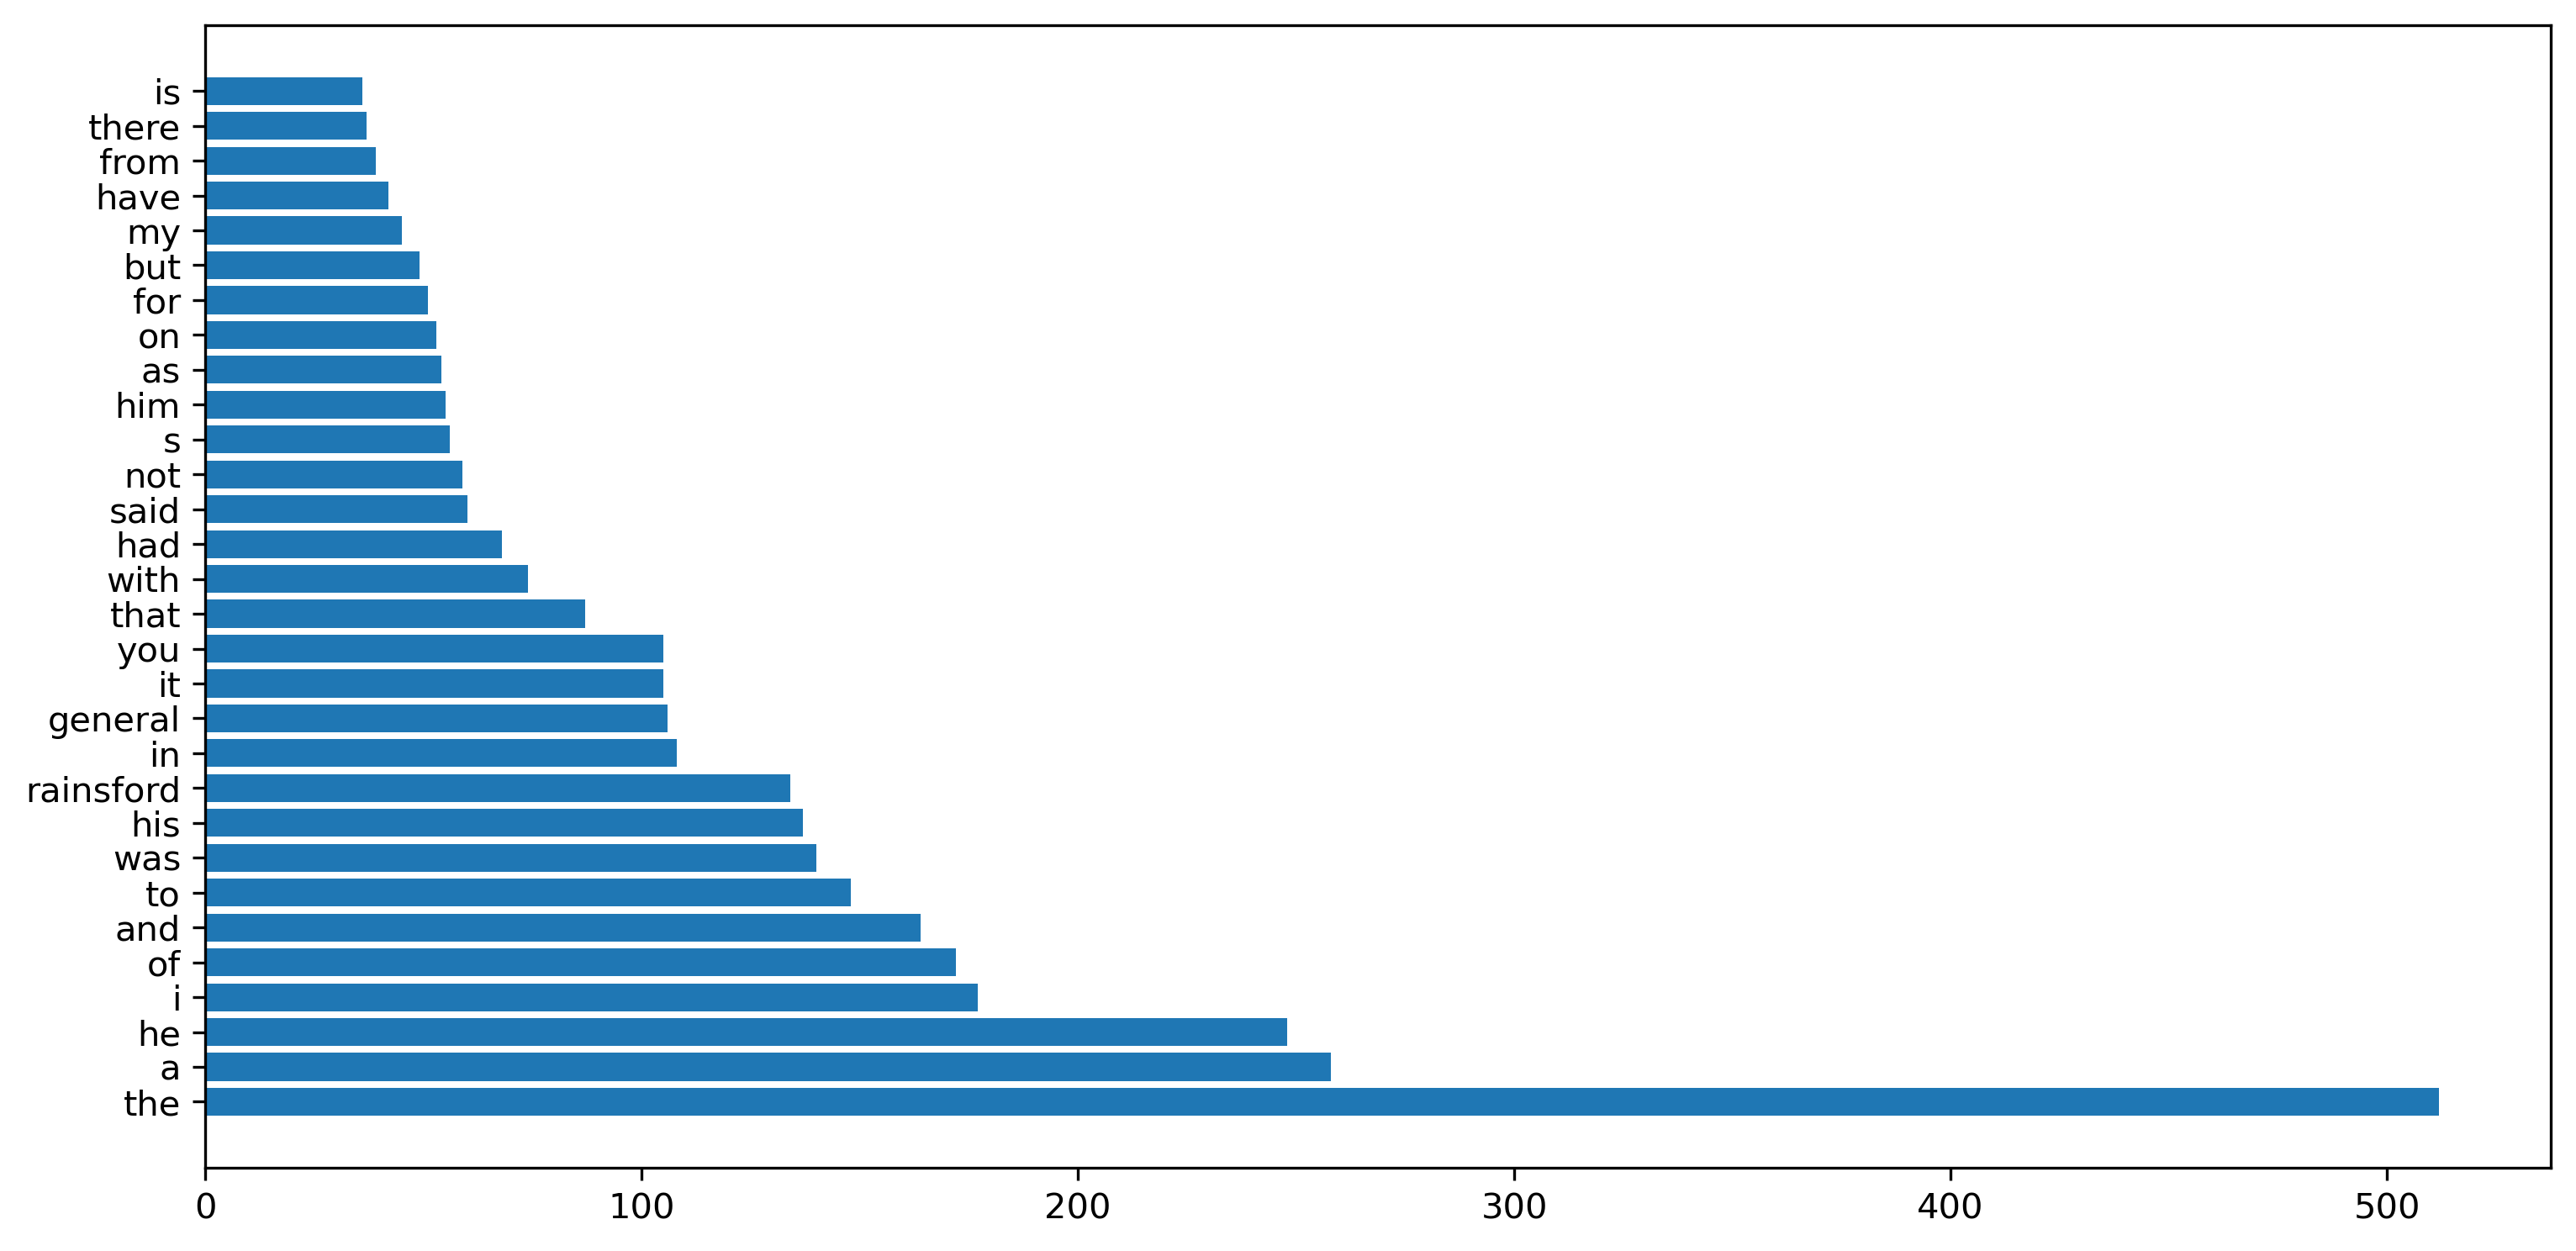

In [61]:
mdg_data = list(mdg_dictionary.items())
mdg_data.sort(key=lambda tup: tup[1], reverse = True)
xs = [x for x, y in mdg_data[0:30]]
ys = [y for x, y in mdg_data[0:30]]

plt.barh(xs, ys)
plt.show()

In [63]:
print(len(mdg_words), len(mdg_data), mdg_data[0])
print(mdg_data[0][1] / len(mdg_words))

8132 1927 ('the', 512)
0.06296114117068372


![The Usual Suspects](images/common-words.png)

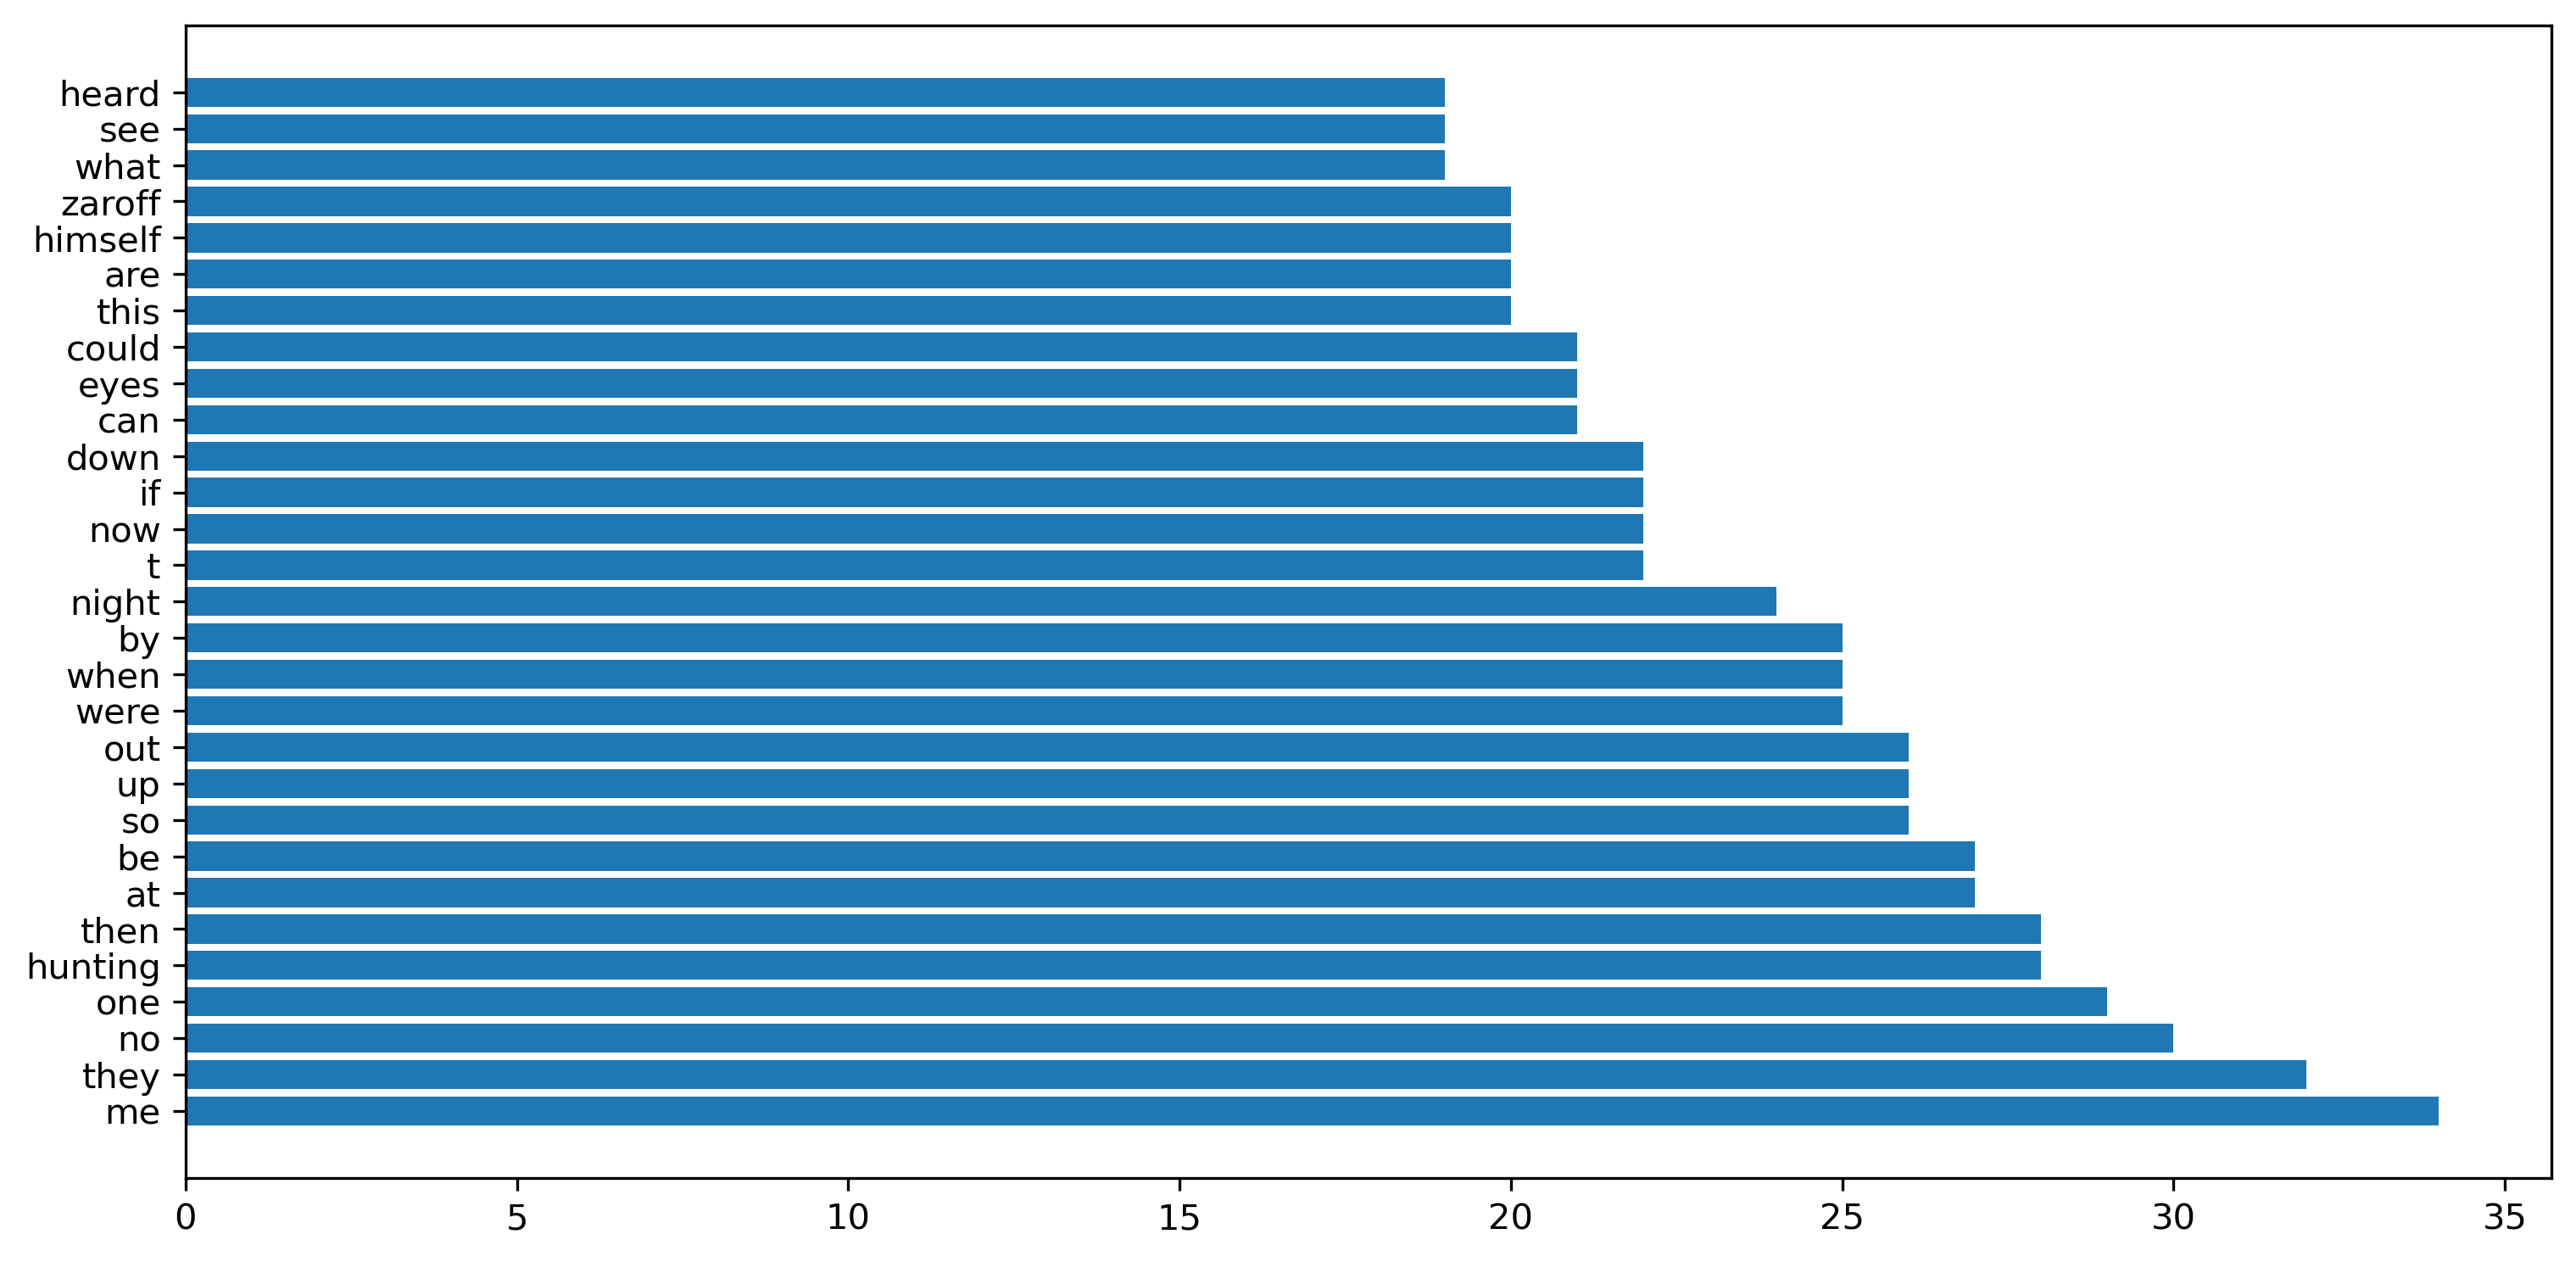

In [55]:
xs = [x for x, y in data[31:60]]
ys = [y for x, y in data[31:60]]
plt.barh(xs, ys)
plt.show()

Determing the frequency of words is about as fundamental as it gets. And it really is useful. When I teach "The Most Dangerous Game" to undergraduates, I like to throw a spreadsheet up which just lists all the words of the story, from most frequent to least, paired with their number of occurrences. I then ask students to go through the list and draw a line where the words become significant. A lot of the most common words, as we will see in a moment, do not carry much semantic weight -- they function, as linguists observe, as syntactic glue. The same can be said for words that occur infrequently, and I ask students to draw another line. Scanning through a frequency distribution, as such a list is called, is one place to start asking questions that you can then operationalize in your code.

## The NLTK Way

In [74]:
fd = nltk.FreqDist(mdg_words)

for word, frequency in fd.most_common(10):
    print('{}:  {}'.format(word, frequency))

the:  512
a:  258
he:  248
i:  177
of:  172
and:  164
to:  148
was:  140
his:  137
rainsford:  134


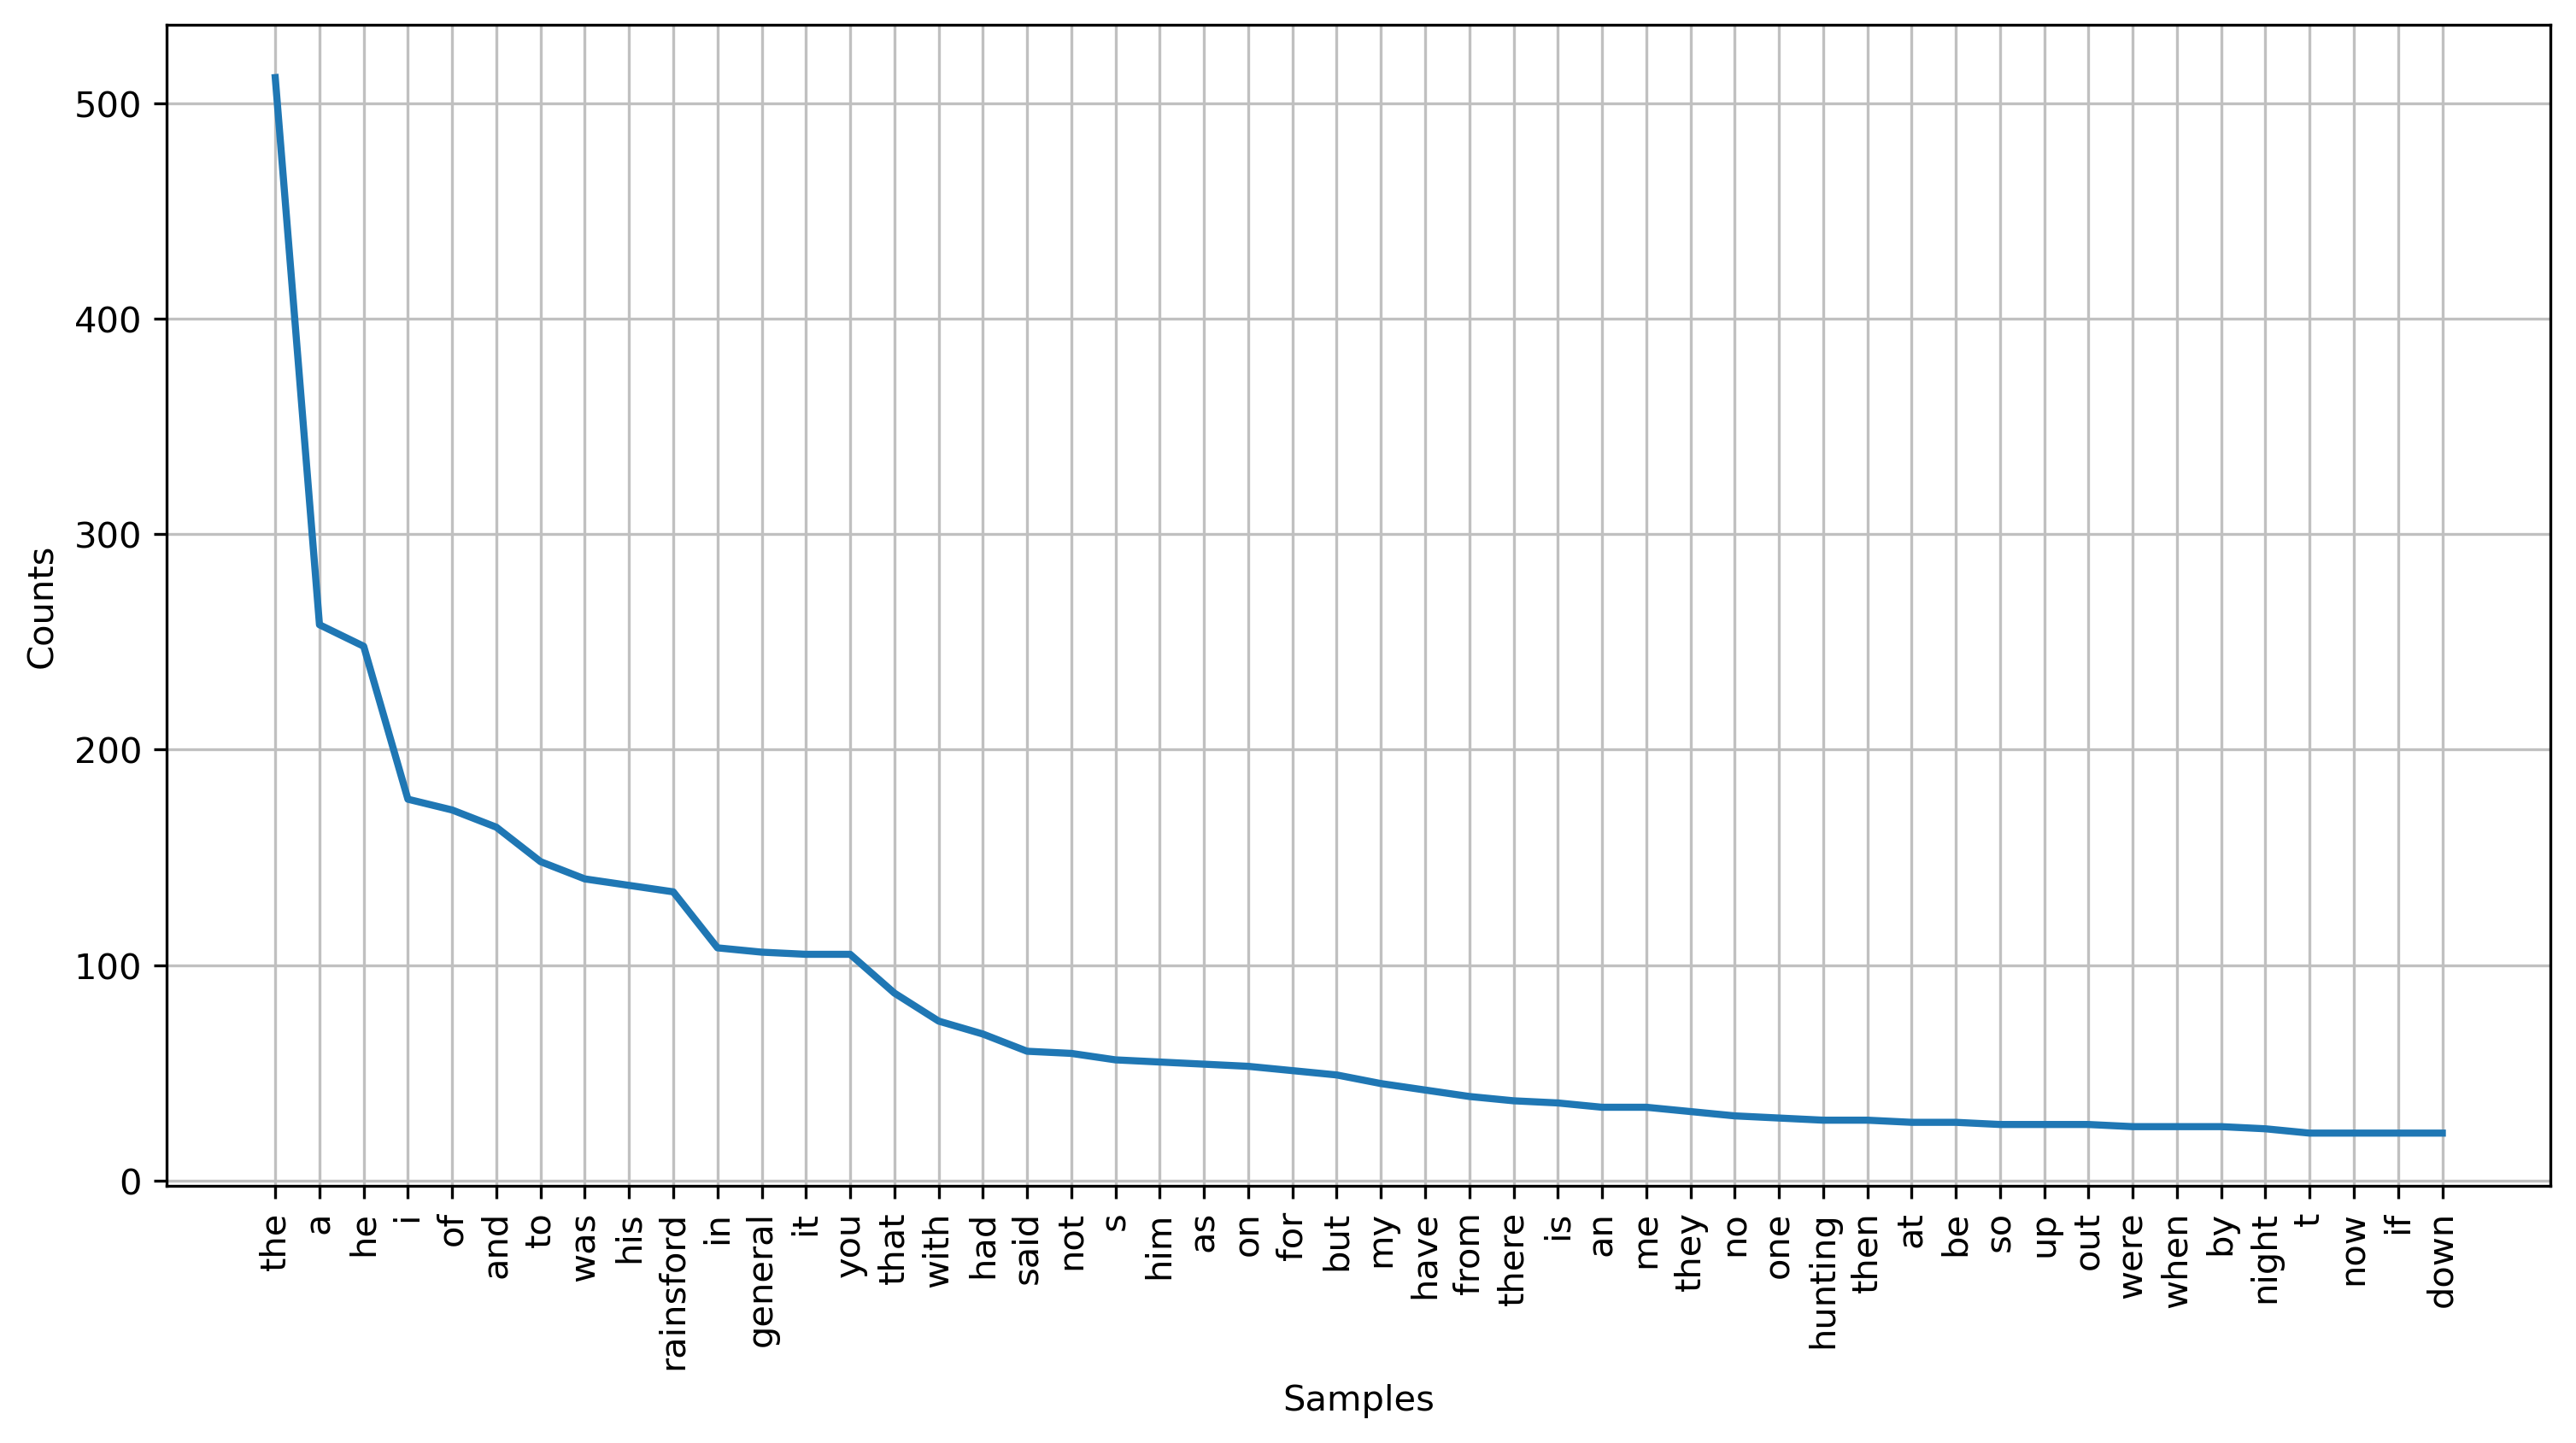

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [76]:
# Let's graph the 50 most frequent words:
top_fifty = nltk.FreqDist(dict(fd.most_common(50)))
top_fifty.plot()

### ngrams

In [87]:
all_counts = dict()
for size in 2, 3, 4, 5:
    all_counts[size] = nltk.FreqDist(nltk.ngrams(mdg_words, size))

print(all_counts[4].most_common(5))
print(all_counts[3].most_common(5))
print(all_counts[2].most_common(10))

[(('said', 'the', 'general', 'i'), 5), (('the', 'window', 'and', 'looked'), 4), (('oh', 'said', 'the', 'general'), 3), (('why', 'should', 'i', 'not'), 3), (('went', 'to', 'the', 'window'), 3)]
[(('said', 'the', 'general'), 15), (('the', 'general', 's'), 9), (('the', 'general', 'i'), 8), (('he', 'heard', 'the'), 5), (('he', 'did', 'not'), 5)]
[(('the', 'general'), 82), (('of', 'the'), 48), (('in', 'the'), 35), (('it', 'was'), 25), (('he', 'was'), 22), (('he', 'said'), 21), (('he', 'had'), 20), (('general', 'zaroff'), 20), (('to', 'the'), 18), (('on', 'the'), 17)]


### Key Words in Context (KWiC)

In [89]:
mdg_text = nltk.Text(mdg.lower().split())

In [95]:
# Try any of the following: hunt, hunted, hunter, dark, jungle, game
word = "jungle"
print(mdg_text.concordance(word))

Displaying 7 of 7 matches:
ched a flat place at the top. dense jungle came down to the very edge of the c
n him. he flung himself down at the jungle edge and tumbled headlong into the 
nbroken front of snarled and ragged jungle fringed the shore. he saw no sign o
rashed about in the underbrush; the jungle weeds were crushed down and the mos
rkness was blacking out the sea and jungle when rainsford sighted the lights. 
 that complicated trail through the jungle after dark. but perhaps the general
e shoulders surged through the tall jungle weeds; it was the giant ivan, and h
None


## Dispersion Plots

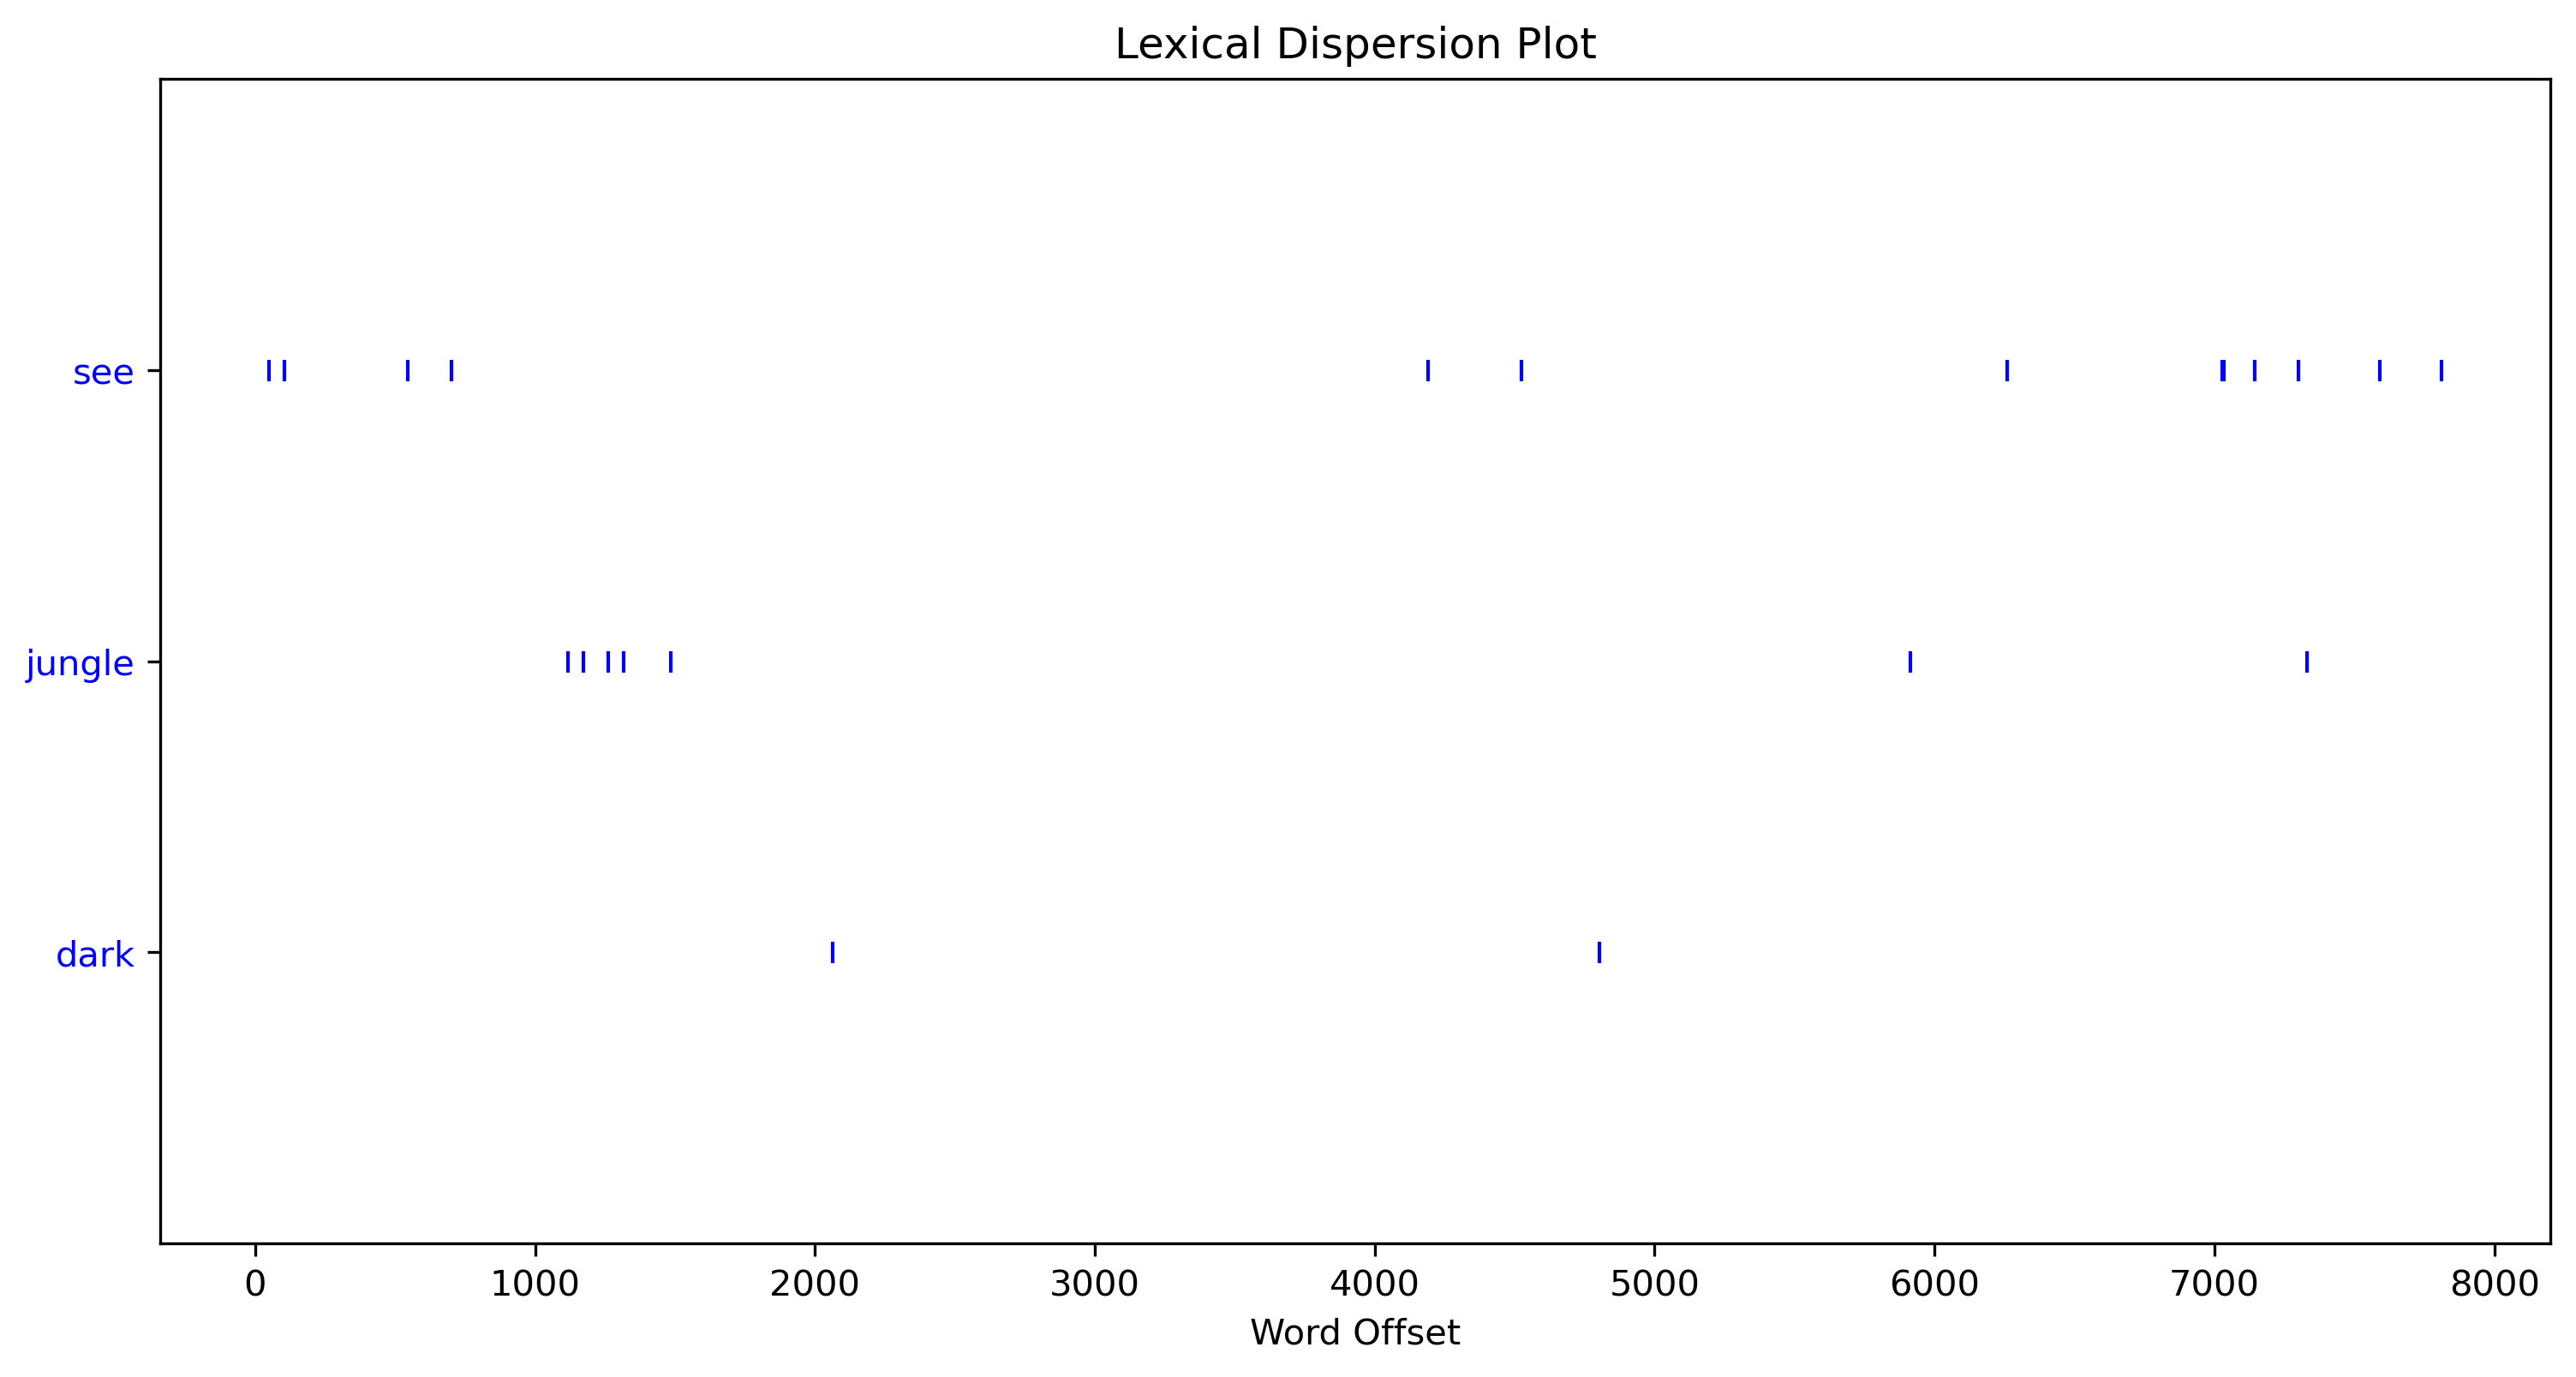

In [98]:
mdg_text.dispersion_plot(["see", "jungle", "dark"])

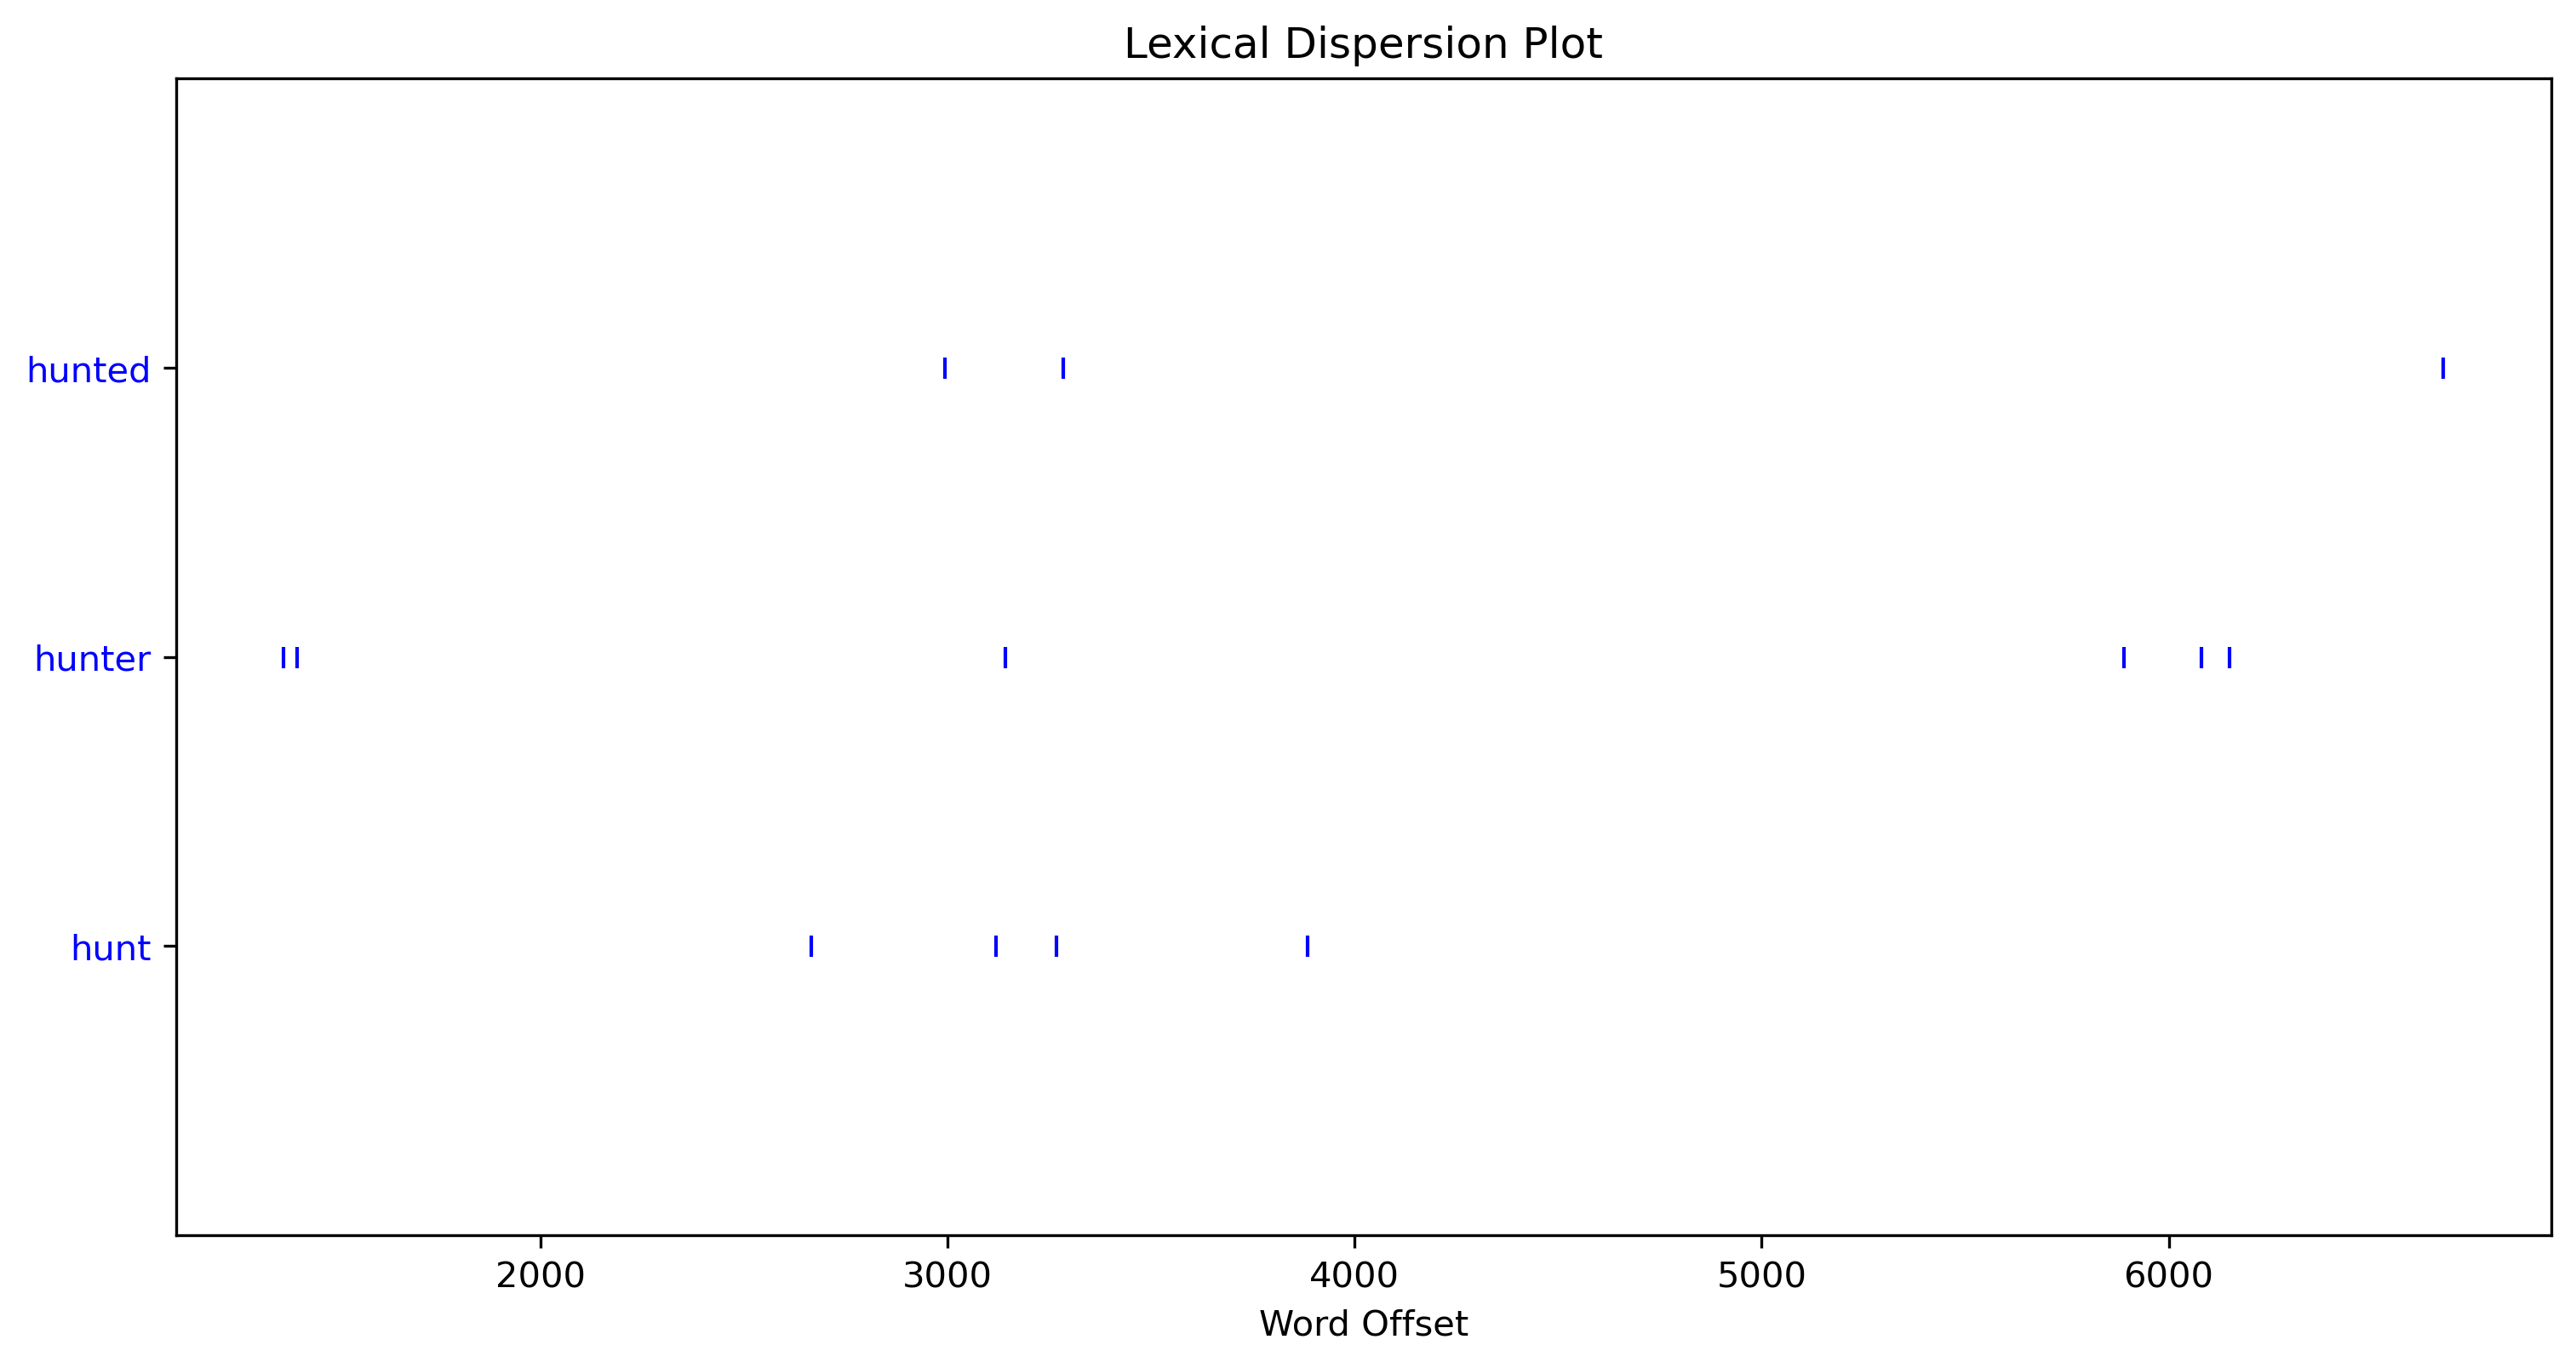

In [97]:
my_list = ["hunted", "hunter", "hunt"]
mdg_text.dispersion_plot(my_list)

In [100]:
mdg_text.similar("eyes")

he general rainsford of they then when sleep expert someone reports
animal hands deepest hunter forehead plate tongue rowers feet


In [101]:
mdg_text.common_contexts(["hounds", "hunter"])

the_stopped


In [102]:
mdg_text.collocations()

cape buffalo; general zaroff; general zaroff.; said rainsford.; dear
fellow,"; mr. rainsford.; young man; could see; "oh," said; could
follow; mr. rainsford,; "thank you,; general zaroff,; general
zaroff."; real enough;; "my dear; clothes, food,; general. "how; right
hand; rainsford knew


Some of the parts of speech you can query: common nouns (NN or NNS), proper nouns (NNP),  verbs (VB, VBD, VBG, etc.), adjectives (JJ, JJR, JJS), adverbs (RB, RBR, RBS), pronouns (PRP, PRP$).

In [108]:
mylist = nltk.pos_tag(mdg_words[0:80])
for word, value in mylist:
    if value == 'NN':
        print(word)

right
island
whitney
mystery
island
rainsford
island
whitney
name
isn
dread
place
superstition
rainsford
night
blackness


## And how do we group words?

By text (document)? 

    co-occurrence

By discourse?

    collocation

You may also hear co-occurrence termed *bag of words* (or `BoW`) and collocation termed *n-grams*. 

## Text Mining, Text Analysis, Text Analytics

All text mining is simply an attempt to find numerical representations of texts that are meaningful/useful to the analyst. Nothing more. If there is magic in it, then it is in the **speed** and with which it can be done and the **scale** on which it can be come. 

There are a lot of possibilities, a lot of them based on things we have covered here. 

E.g., **topic modeling** treats texts as bags of words in order to determine which words are more likely to co-occur with other words in a given collection of texts. (Collections that have been structured or formed in a particular way are often called corpora: building a corpus and making it available is considered a worthy endeavor for most analysts.)

Topic models, like other statistical approaches that reduce texts to "bags of words" do not care about syntax. (Topic models, like honey badgers, don't care.)

Here's the hard part for those of us in the humanities to accept: (1) The math works. (2) Cognitive studies suggest it captures some essential elements of how we think about texts.

## Questions?